In [32]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
%matplotlib inline

#### Check out the data

In [33]:
# merging two csv files 
# student_data = pd.read_csv('combined_file.csv')
#student_data = pd.concat(map(pd.read_csv, ['student-mat.csv', 'student-por.csv']), ignore_index=True)

# Read the CSV files
df1 = pd.read_csv('student-mat.csv')
df2 = pd.read_csv('student-por.csv')

# Merge the two dataframes
student_data = pd.concat([df1, df2])

student_data.to_csv("combined.csv", index=False)

##### Understand the data

In [34]:
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [35]:
student_data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [36]:
student_data.drop(columns=student_data.columns[0], axis=1,  inplace=True)

In [37]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, 0 to 648
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         1044 non-null   object
 1   age         1044 non-null   int64 
 2   address     1044 non-null   object
 3   famsize     1044 non-null   object
 4   Pstatus     1044 non-null   object
 5   Medu        1044 non-null   int64 
 6   Fedu        1044 non-null   int64 
 7   Mjob        1044 non-null   object
 8   Fjob        1044 non-null   object
 9   reason      1044 non-null   object
 10  guardian    1044 non-null   object
 11  traveltime  1044 non-null   int64 
 12  studytime   1044 non-null   int64 
 13  failures    1044 non-null   int64 
 14  schoolsup   1044 non-null   object
 15  famsup      1044 non-null   object
 16  paid        1044 non-null   object
 17  activities  1044 non-null   object
 18  nursery     1044 non-null   object
 19  higher      1044 non-null   object
 20  internet    10

In [38]:
print(student_data.duplicated().sum())
student_data.drop_duplicates()
student_data.info()

0
<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, 0 to 648
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         1044 non-null   object
 1   age         1044 non-null   int64 
 2   address     1044 non-null   object
 3   famsize     1044 non-null   object
 4   Pstatus     1044 non-null   object
 5   Medu        1044 non-null   int64 
 6   Fedu        1044 non-null   int64 
 7   Mjob        1044 non-null   object
 8   Fjob        1044 non-null   object
 9   reason      1044 non-null   object
 10  guardian    1044 non-null   object
 11  traveltime  1044 non-null   int64 
 12  studytime   1044 non-null   int64 
 13  failures    1044 non-null   int64 
 14  schoolsup   1044 non-null   object
 15  famsup      1044 non-null   object
 16  paid        1044 non-null   object
 17  activities  1044 non-null   object
 18  nursery     1044 non-null   object
 19  higher      1044 non-null   object
 20  internet    

In [39]:
#sns.catplot(x="sex", y="studytime", data=student_data, kind="box", aspect=1.5)
#sns.catplot(x="paid", y="G1", data=student_data, kind="box", aspect=1.5)
#plt.show()

<Axes: >

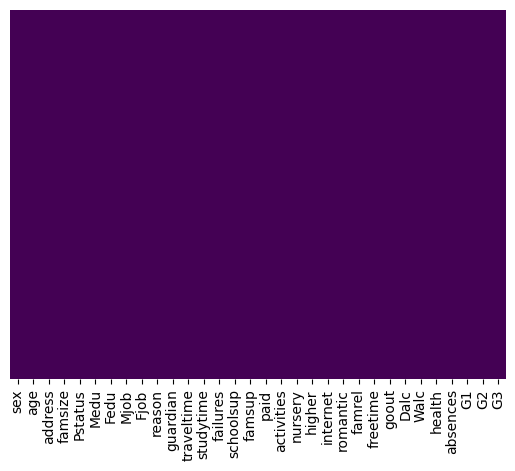

In [40]:
sns.heatmap(student_data.isnull(), yticklabels = False, cbar=False, cmap='viridis')

não ha missing values

### Outliers

In [41]:
student_data.nunique()

sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      35
G1            18
G2            17
G3            19
dtype: int64

<Axes: ylabel='age'>

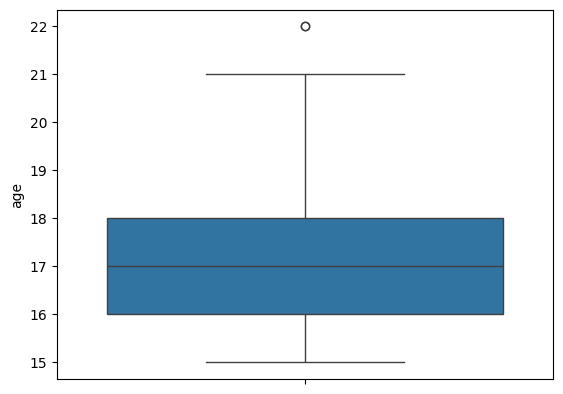

In [42]:
sns.boxplot(y=student_data['age'])# -> nao melhora remover os outliers de G1 e age!!


<Axes: ylabel='absences'>

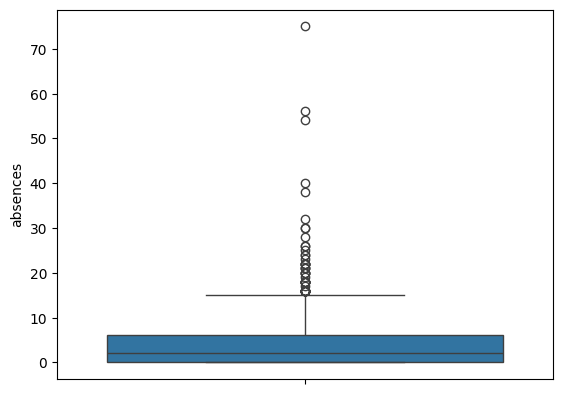

In [43]:
sns.boxplot(y=student_data['absences'])


In [44]:
# remove outliers from 'absences'
student_data = student_data[student_data['absences'] < 45]

#### new columns

In [45]:
'''
new column with the mean of 'walc' and 'dalc'
'''

student_data['Malc'] = np.ceil(student_data[['Walc', 'Dalc']].mean(axis=1)).astype(int)
student_data=student_data.drop(['Walc', 'Dalc'] , axis=1) 


new column 'media dos testes'

In [46]:
student_data['meanG'] = np.ceil(student_data[['G1', 'G2', 'G3']].mean(axis=1)).astype(int) 


In [47]:
student_data.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,health,absences,G1,G2,G3,Malc,meanG
0,F,18,U,GT3,A,4,4,at_home,teacher,course,...,4,3,4,3,6,5,6,6,1,6
1,F,17,U,GT3,T,1,1,at_home,other,course,...,5,3,3,3,4,5,5,6,1,6
2,F,15,U,LE3,T,1,1,at_home,other,other,...,4,3,2,3,10,7,8,10,3,9
3,F,15,U,GT3,T,4,2,health,services,home,...,3,2,2,5,2,15,14,15,1,15
4,F,16,U,GT3,T,3,3,other,other,home,...,4,3,2,5,4,6,10,10,2,9


### Correlation

In [48]:
df_corr = student_data
column_mapping = {
    'sex': {'F': 0, 'M': 1},
    'famsize': {'LE3': 0, 'GT3': 1},
    'Pstatus': {'A': 0, 'T': 1},
    'schoolsup': {'no': 0, 'yes': 1},
    'famsup': {'no': 0, 'yes': 1},
    'paid': {'no': 0, 'yes': 1},
    'activities': {'no': 0, 'yes': 1},
    'nursery': {'no': 0, 'yes': 1},
    'higher': {'no': 0, 'yes': 1},
    'internet': {'no': 0, 'yes': 1},
    'romantic': {'no': 0, 'yes': 1}
}
for column, mapping in column_mapping.items():
    df_corr[column] = df_corr[column].map(mapping)
# Drop columns
df_corr.drop(['address', 'Mjob', 'Fjob', 'reason', 'guardian'], axis=1, inplace=True)


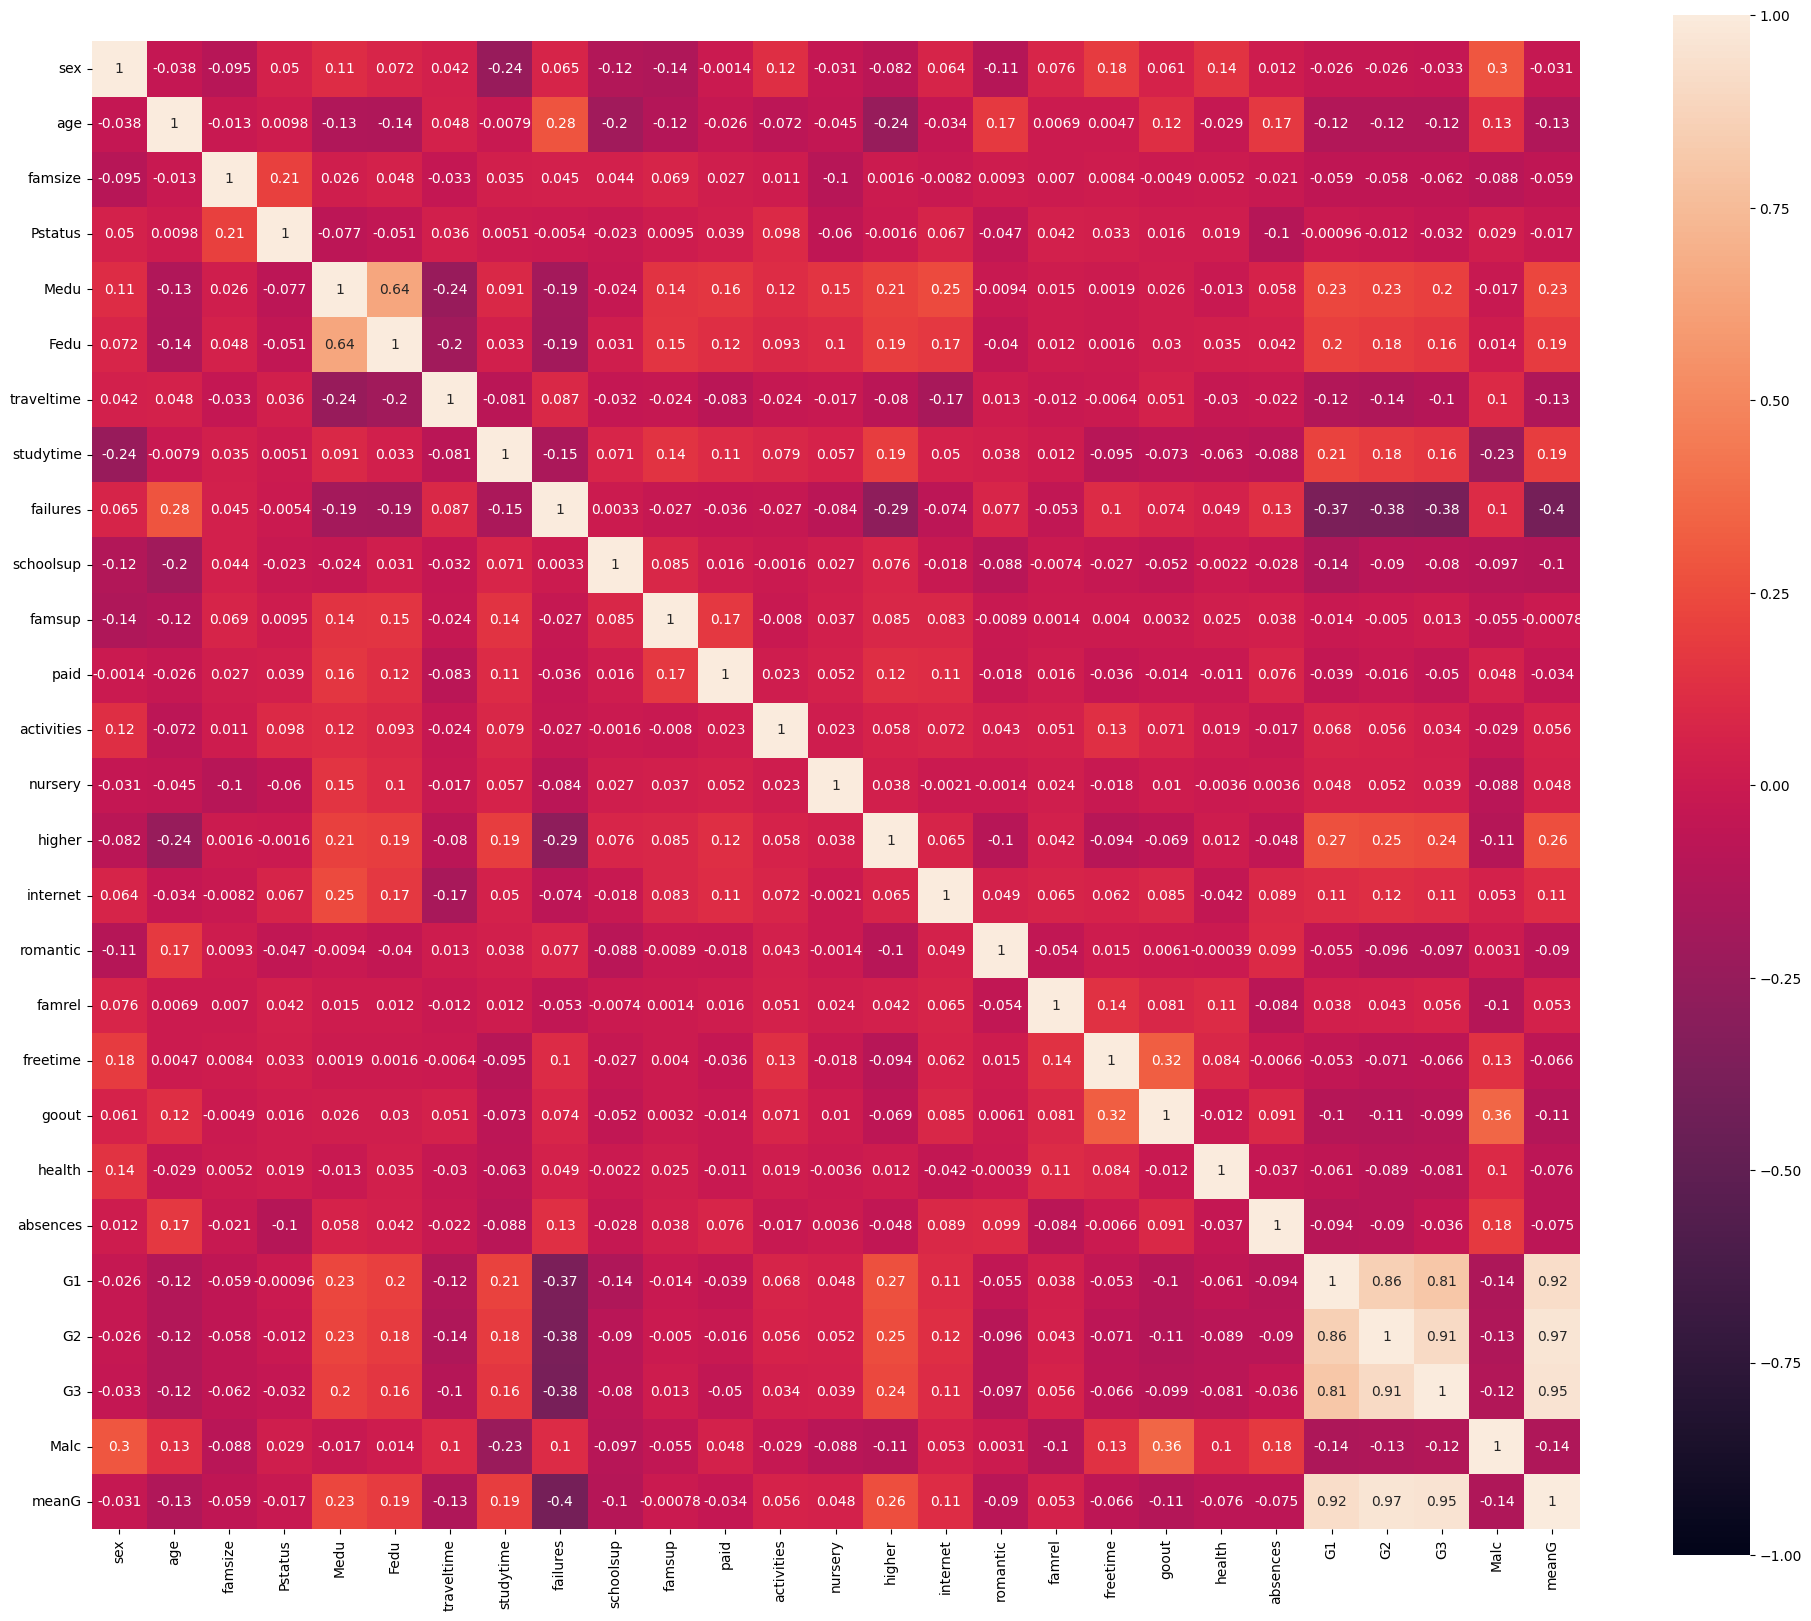

In [49]:
corr_matrix = df_corr.corr(numeric_only=True)
f,ax = plt.subplots(figsize=(24,20))
sns.heatmap(corr_matrix,vmin=-1,vmax=1, square = True, annot = True);

##### Top 10 correlations

In [50]:
top_corr = corr_matrix.unstack()
top_corr = top_corr[top_corr != 1]  
top_10_corr = top_corr['Malc'].nlargest(15)  # Get the top 10 correlations

print(top_10_corr)

goout         0.359160
sex           0.296058
absences      0.176544
freetime      0.134276
age           0.127546
failures      0.104259
health        0.100804
traveltime    0.100545
internet      0.053307
paid          0.047874
Pstatus       0.028833
Fedu          0.013542
romantic      0.003130
Medu         -0.017491
activities   -0.028906
dtype: float64


In [51]:
top_down_corr = corr_matrix.unstack()
top_down_10_corr = top_corr['Malc'].nsmallest(15)  # Get the 10 correlations

print(top_down_10_corr)

studytime    -0.227900
G1           -0.140870
meanG        -0.138815
G2           -0.133152
G3           -0.121349
higher       -0.105388
famrel       -0.102713
schoolsup    -0.096629
nursery      -0.088440
famsize      -0.087811
famsup       -0.054546
activities   -0.028906
Medu         -0.017491
romantic      0.003130
Fedu          0.013542
dtype: float64


who have higher grades in the first, second, and third periods are less likely to fail school

In [71]:
X = df_corr.drop(['meanG', 'famsup', 'sex', 'Pstatus','paid','famsize' ], axis=1)
y = df_corr['meanG'] # accuracy de 0.86

In [62]:
#X = df_corr.drop(['Malc', 'Fedu', 'Medu', 'romantic','activities','famsize', 'famsup' ], axis=1)
#y = df_corr['Malc']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


### Decision Tree

In [73]:
''' decision tree '''
clf = DecisionTreeClassifier(random_state=2021)

In [74]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2021)

In [75]:
y_pred = clf.predict(X_test)

#### Confusion Matrix

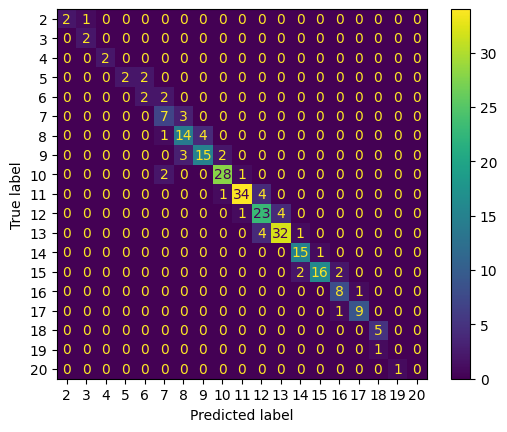

In [76]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred )
plt.show()

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       1.00      0.67      0.80         3
           3       0.67      1.00      0.80         2
           4       1.00      1.00      1.00         2
           5       1.00      0.50      0.67         4
           6       0.50      0.50      0.50         4
           7       0.58      0.70      0.64        10
           8       0.70      0.74      0.72        19
           9       0.79      0.75      0.77        20
          10       0.90      0.90      0.90        31
          11       0.94      0.87      0.91        39
          12       0.74      0.82      0.78        28
          13       0.89      0.86      0.88        37
          14       0.83      0.94      0.88        16
          15       0.94      0.80      0.86        20
          16       0.73      0.89      0.80         9
          17       0.90      0.90      0.90        10
          18       0.83      1.00      0.91         5
          19       0.00    

/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [78]:
accuracy = accuracy_score(y_test, y_pred)
print(f'accuracy: {accuracy:.2f}')

accuracy: 0.83


#### Linear Regression

In [79]:
from sklearn import linear_model

# Create linear regression object 
regr = linear_model.LinearRegression() 
   
# Train the model using the training sets 
regr.fit(X_train, y_train) 
   


LinearRegression()

In [81]:
#display regression coefficients and R-squared value of model
print(regr.intercept_, regr.coef_, regr.score(X, y))


0.43676540005905373 [ 0.00423182  0.01278492 -0.00943849 -0.03291379 -0.02588009 -0.02891956
  0.0183342  -0.00147214 -0.01852032 -0.05529018 -0.01348079 -0.0176407
  0.00792635  0.00289118 -0.00968374  0.00469863 -0.00148315  0.34197208
  0.33769483  0.31892804  0.0004372 ] 0.9929647112700603


intercept -> representa o valor da variavel dependente (meanG) quando todas as vars independentes sao zeros

r-squared value -> mede quao bem as variaveis indepedentes explicam a variedade da var depedente. (1 indica a perfect fit)



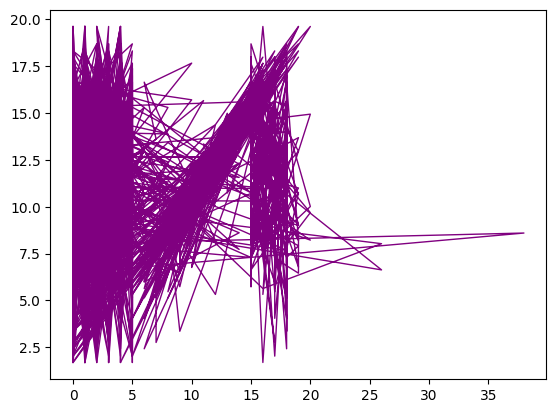

In [84]:

# Plot outputs 
plt.plot(X_test, regr.predict(X_test), color='purple',linewidth=1) 
plt.show()

#### GridSearchCV

In [29]:
from sklearn.model_selection import GridSearchCV

In [212]:
print(clf.get_depth())
print(clf.get_n_leaves())

12
120


In [213]:
param_grid_dt = {'criterion' : ['gini', 'entropy'], 'max_depth': [1,2,3,4,5,6,7]}
estimator_dt = DecisionTreeClassifier(random_state=2022)
grid_dt = GridSearchCV(estimator_dt, param_grid_dt, refit = True, verbose=2) # cv=10 -> folds

In [214]:
grid_dt.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini,

GridSearchCV(estimator=DecisionTreeClassifier(random_state=2022),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7]},
             verbose=2)

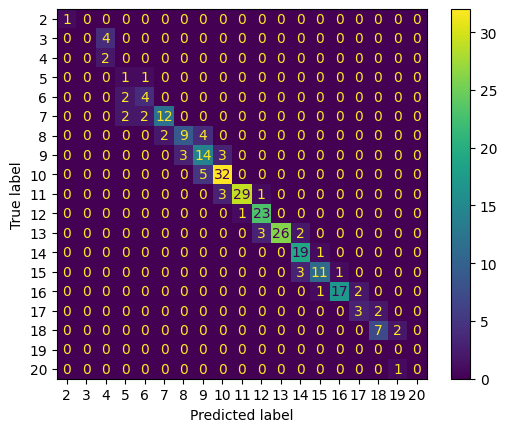

In [215]:
ConfusionMatrixDisplay.from_predictions(y_test, grid_dt.predict(X_test))
plt.show()

In [216]:
print(classification_report(y_test, grid_dt.predict(X_test)))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         4
           4       0.33      1.00      0.50         2
           5       0.20      0.50      0.29         2
           6       0.57      0.67      0.62         6
           7       0.86      0.75      0.80        16
           8       0.75      0.60      0.67        15
           9       0.61      0.70      0.65        20
          10       0.84      0.86      0.85        37
          11       0.97      0.88      0.92        33
          12       0.85      0.96      0.90        24
          13       1.00      0.84      0.91        31
          14       0.79      0.95      0.86        20
          15       0.85      0.73      0.79        15
          16       0.94      0.85      0.89        20
          17       0.60      0.60      0.60         5
          18       0.78      0.78      0.78         9
          19       0.00    

/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result

Com a abordagem GridSearchCV a nossa accuracy melhorou para 0.82

#### Decision Tree Pruning

In [217]:
print(clf.get_depth())
print(clf.get_n_leaves())

12
120


In [218]:
max_depth = clf.get_depth()

In [219]:
param_grid = {'max_depth' : [max_depth for max_depth in range(1,max_depth+1)]}
estimator = DecisionTreeClassifier(random_state=42)
max_depth_grid_search = GridSearchCV(estimator,param_grid)

max_depth_grid_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]})

In [220]:
max_depth_grid_search.best_params_

{'max_depth': 9}

In [221]:
max_depth_tree = max_depth_grid_search.best_estimator_
print(max_depth_tree)

DecisionTreeClassifier(max_depth=9, random_state=42)


In [222]:
best_max_depth = max_depth_tree.get_depth()
print(best_max_depth)

9


In [223]:
print(classification_report(y_test, max_depth_tree.predict(X_test)))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         2
           5       0.20      0.50      0.29         2
           6       0.57      0.67      0.62         6
           7       0.89      0.50      0.64        16
           8       0.56      0.67      0.61        15
           9       0.73      0.80      0.76        20
          10       0.92      0.89      0.90        37
          11       0.88      0.88      0.88        33
          12       0.88      0.96      0.92        24
          13       0.96      0.87      0.92        31
          14       0.85      0.85      0.85        20
          15       0.86      0.80      0.83        15
          16       0.95      0.95      0.95        20
          17       0.83      1.00      0.91         5
          18       1.00      1.00      1.00         9
          19       0.00    

/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/francisca/miniconda3/envs/daa/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result

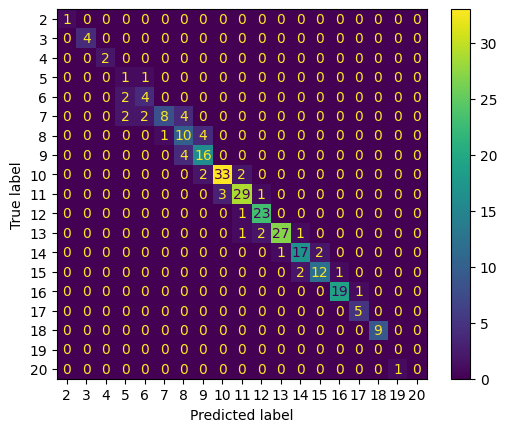

In [224]:
ConfusionMatrixDisplay.from_predictions(y_test, max_depth_grid_search.predict(X_test))
plt.show()

### Random Forest

In [228]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

# Generate synthetic data
X, y = make_regression(n_features=4, n_informative=2, random_state=0, shuffle=False)

# Create and fit the RandomForestRegressor
rfr = RandomForestRegressor(max_depth=6)
rfr.fit(X, y)

# Reshape the input for prediction
input_data = np.array([0, 0, 0, 0]).reshape(1, -1)

# Make the prediction
prediction = rfr.predict(input_data)
print(prediction)

[1.87465238]


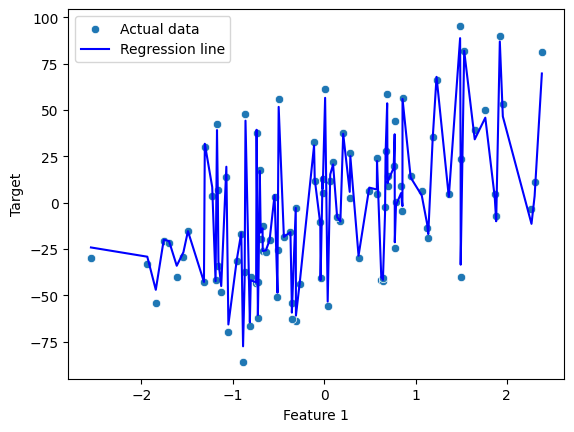

In [230]:
sns.scatterplot(x=X[:, 0], y=y, label='Actual data')
sns.lineplot(x=X[:, 0], y=rfr.predict(X), color='blue', label='Regression line')
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.legend()
plt.show()

In [232]:
from sklearn.metrics import mean_absolute_error, r2_score

# Assuming you have a test set (X_test, y_test)
y_pred = rfr.predict(X)  # Assuming X is your training data

# Calculate Mean Absolute Error
mae = mean_absolute_error(y, y_pred)
print(f'Mean Absolute Error: {mae}')

# Calculate R-squared
r2 = r2_score(y, y_pred)
print(f'R-squared: {r2}')

Mean Absolute Error: 2.5918397490394214
R-squared: 0.9921831636803513


Accuracy-like Metric: 0.1
